<a href="https://colab.research.google.com/github/MF-MSB/neural-network-challenge-2/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [3]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  NumCompaniesWorked      

In [4]:
# Create a copy of the DataFrame to preserve the original data
new_attrition_df = attrition_df.copy()

# Map "Yes" to 1 and "No" to 0 in the "Attrition" column
new_attrition_df['Attrition'] = new_attrition_df['Attrition'].map({'Yes': 1, 'No': 0})


<ipython-input-5-f239fbce93ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = new_attrition_df.corr()


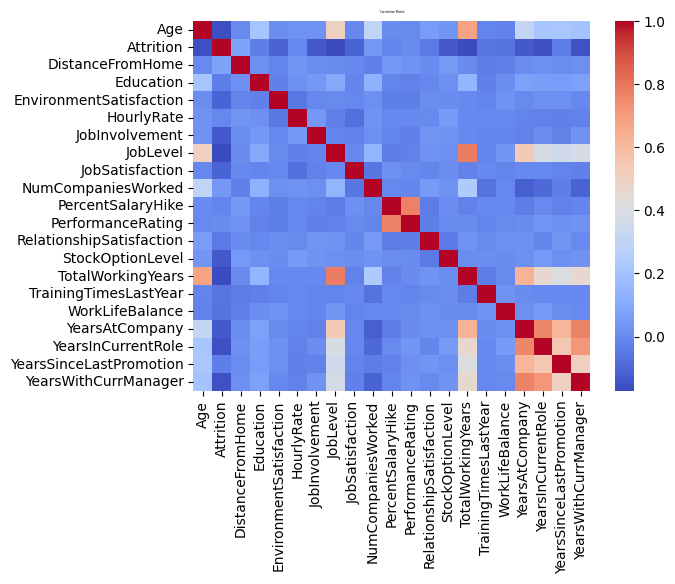

In [5]:
# Calculate the correlation matrix
corr_matrix = new_attrition_df.corr()

# Display the matrix with annotations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix', fontsize=2, color='black')

# Display the plot
plt.show()

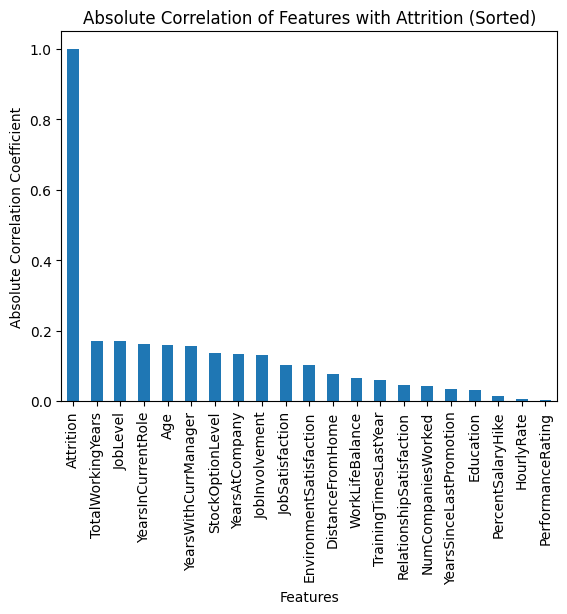

In [6]:
import matplotlib.pyplot as plt

# Assuming 'corr_matrix' is your correlation matrix and 'Attrition' is the target variable column

# Convert correlation values to absolute values to make all of them positive
target_abs = corr_matrix['Attrition'].abs()

# Sort the absolute values in descending order
target_sorted = target_abs.sort_values(ascending=False)

# Display a plot of the sorted absolute target correlations
target_sorted.plot(kind='bar')
plt.title('Absolute Correlation of Features with Attrition (Sorted)')
plt.ylabel('Absolute Correlation Coefficient')
plt.xlabel('Features')
plt.show()



In [7]:
# Determine the number of unique values in each column.
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>],
       [<Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsInCurrentRole'}>,
        <Axes: title={'center': 'Year

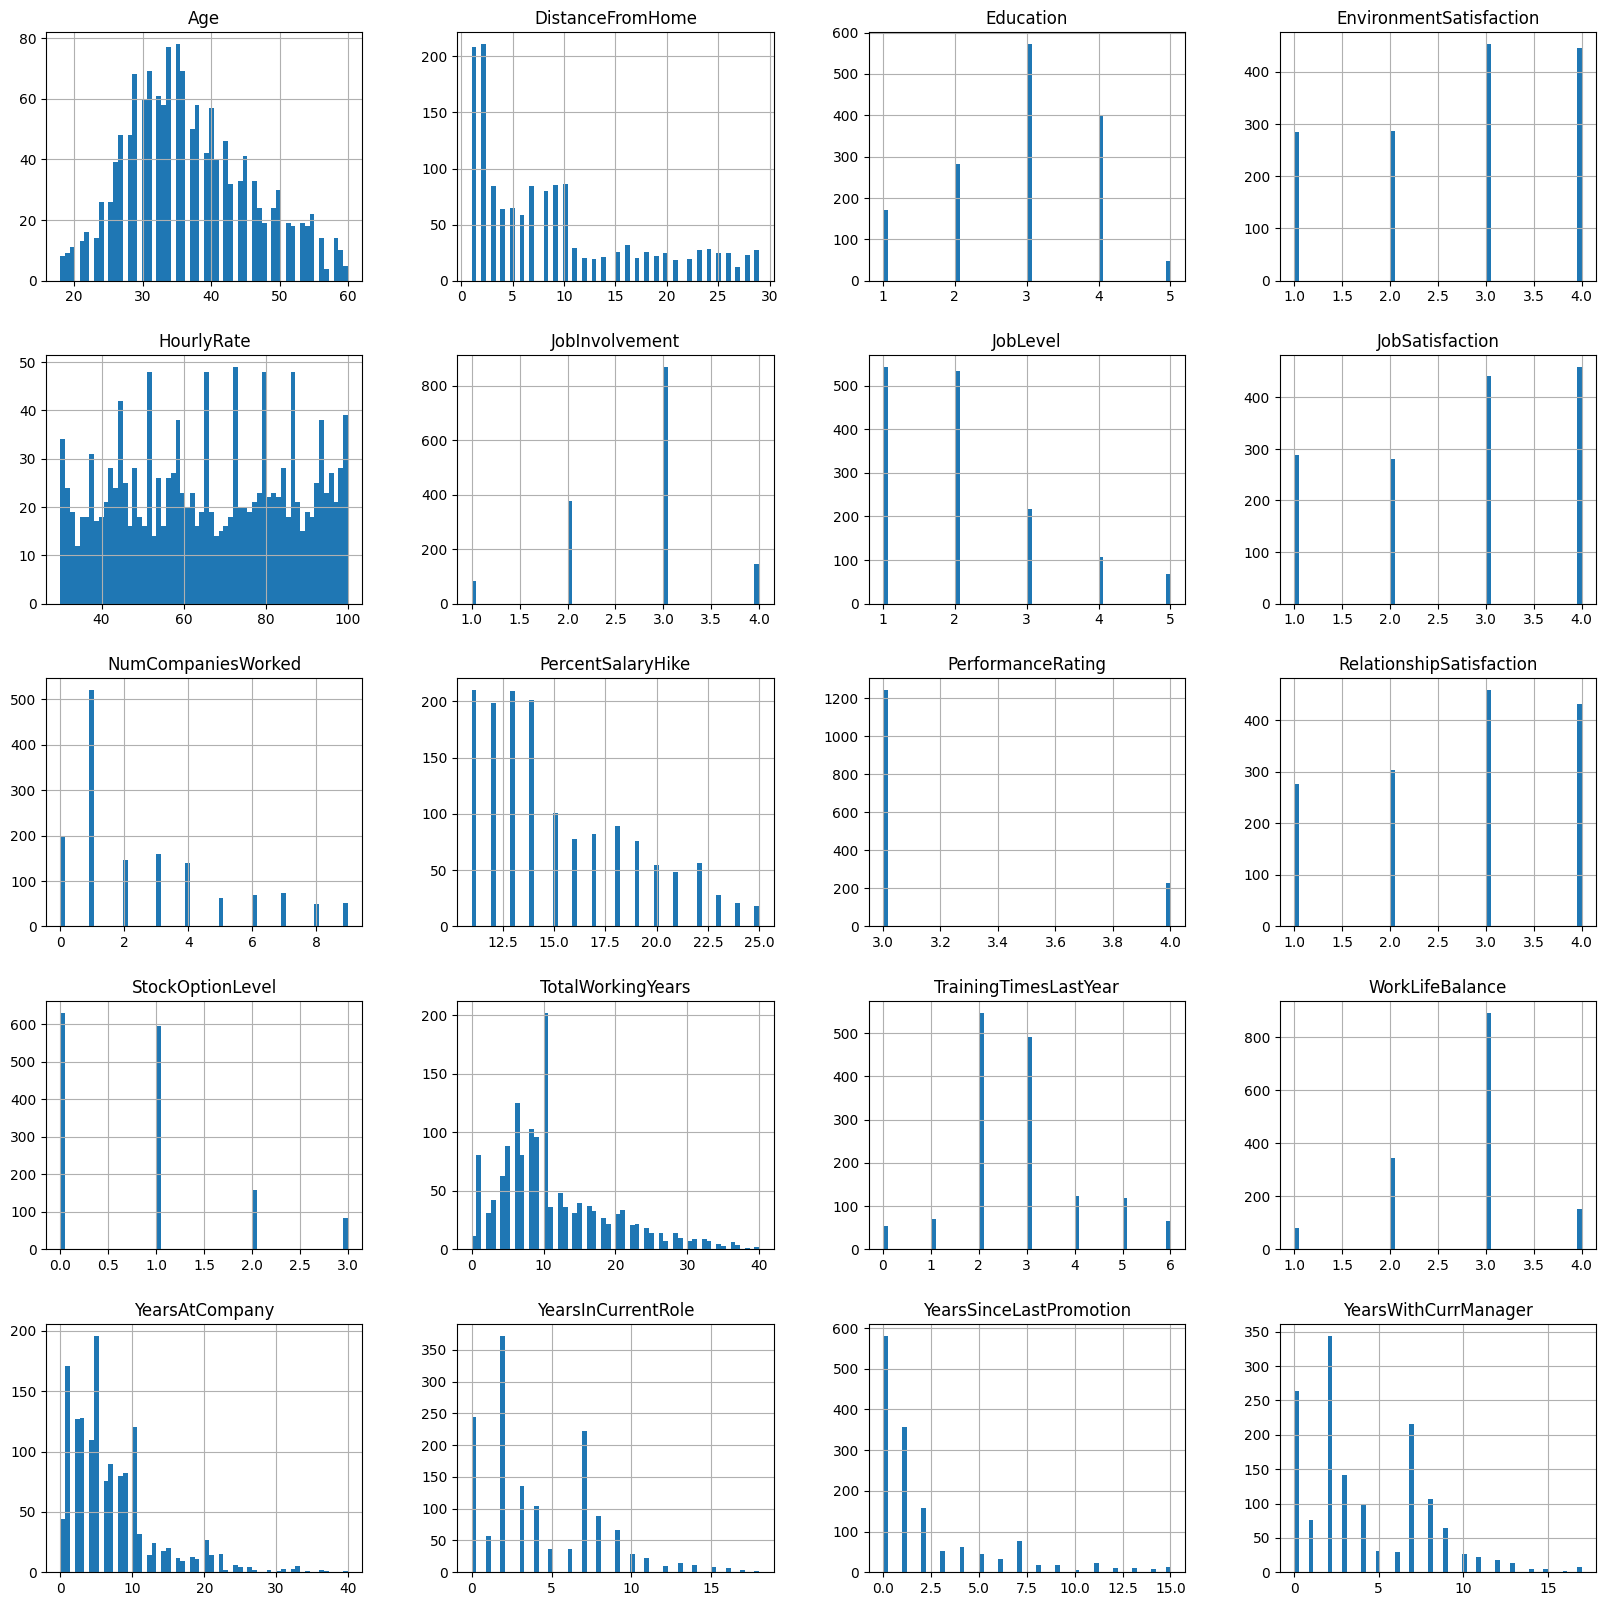

In [8]:
attrition_df.hist(bins=60, figsize=(20,20))


<ipython-input-9-83637d113440>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = attrition_df.corr()


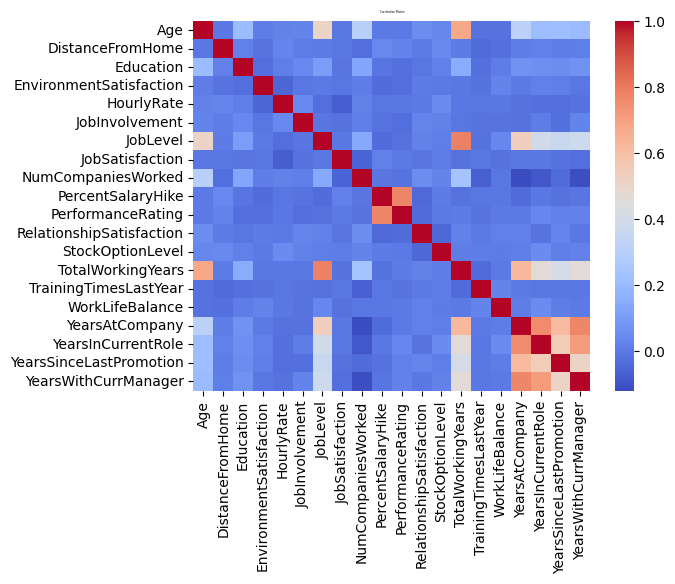

In [9]:
# Calculate the correlation matrix
corr_matrix = attrition_df.corr()

# Display the matrix with annotations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix', fontsize=2, color='black')

# Display the plot
plt.show()

In [10]:
# Create y_df with the Attrition and Department columns

y_df = attrition_df[['Attrition', 'Department']]

In [11]:
attrition_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
# Create a list of at least 10 column names to use as X data
# I've removed JobRole it's too close to the Department target
# I've removed marital status. If this impacts the model it could impact hiring decisions.

x_columns = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'HourlyRate', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# Create X_df using your selected columns

X_df = attrition_df[x_columns].drop(columns=['Attrition', 'Department'])

# Show the data types for X_df

print(X_df.dtypes)

Age                         int64
BusinessTravel             object
DistanceFromHome            int64
Education                   int64
EducationField             object
HourlyRate                  int64
JobLevel                    int64
JobSatisfaction             int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
dtype: object


In [38]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary

unique_values = X_df[['BusinessTravel', 'EducationField', 'OverTime']].apply(lambda x: x.unique())
print(unique_values)

BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
EducationField    [Life Sciences, Other, Medical, Marketing, Tec...
OverTime                                                  [Yes, No]
dtype: object


In [39]:
# Perform encoding on the 'Overtime' column
X_df = pd.get_dummies(X_df, columns=['OverTime'], drop_first=True)

In [40]:
X_df.columns

Index(['Age', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'HourlyRate', 'JobLevel', 'JobSatisfaction',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'OverTime_Yes'],
      dtype='object')

In [41]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False to ensure the output is a dense array

# Select the columns to encode
columns_to_encode = ['BusinessTravel', 'EducationField']

# Fit and transform the data
encoded_data = encoder.fit_transform(X_df[columns_to_encode])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop the original columns to be encoded from X_df
X_df_dropped = X_df.drop(columns=columns_to_encode)

# Concatenate the original DataFrame (without the encoded columns) and the new encoded DataFrame
X_df = pd.concat([X_df_dropped, encoded_df], axis=1)

X_df.head()  # Display the first few rows of the updated DataFrame

,Age,DistanceFromHome,Education,HourlyRate,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,OverTime_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,2,94,2,4,8,11,0,8,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,8,1,61,2,2,1,23,1,10,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37,2,2,92,1,3,6,15,0,7,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,3,4,56,1,3,1,11,0,8,...,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,27,2,1,40,1,2,9,12,1,6,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
print(X_df.dtypes)

Age                                   int64
DistanceFromHome                      int64
Education                             int64
HourlyRate                            int64
JobLevel                              int64
JobSatisfaction                       int64
NumCompaniesWorked                    int64
PercentSalaryHike                     int64
StockOptionLevel                      int64
TotalWorkingYears                     int64
TrainingTimesLastYear                 int64
WorkLifeBalance                       int64
YearsAtCompany                        int64
YearsInCurrentRole                    int64
YearsSinceLastPromotion               int64
OverTime_Yes                          uint8
BusinessTravel_Non-Travel           float64
BusinessTravel_Travel_Frequently    float64
BusinessTravel_Travel_Rarely        float64
EducationField_Human Resources      float64
EducationField_Life Sciences        float64
EducationField_Marketing            float64
EducationField_Medical          

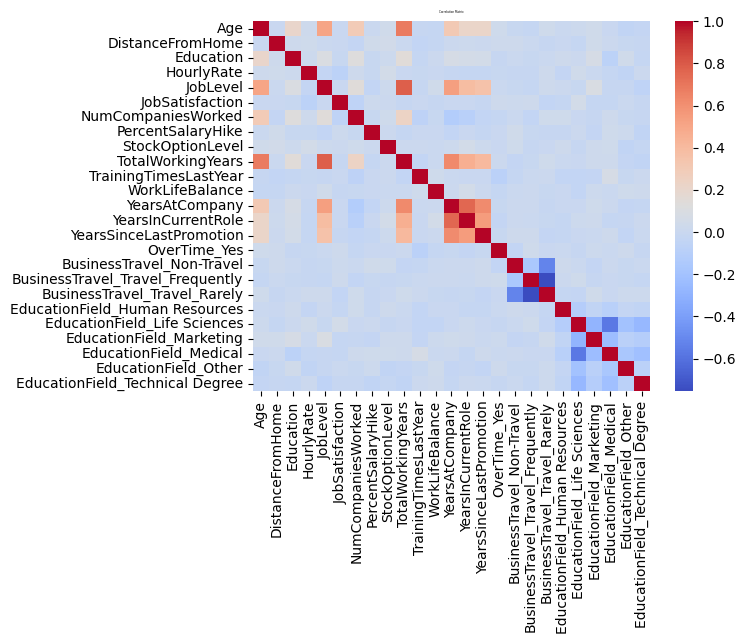

In [43]:
# Calculate the correlation matrix
corr_matrix = X_df.corr()

# Display the matrix with annotations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix', fontsize=2, color='black')

# Display the plot
plt.show()

In [44]:
X_df.nunique()

Age                                 43
DistanceFromHome                    29
Education                            5
HourlyRate                          71
JobLevel                             5
JobSatisfaction                      4
NumCompaniesWorked                  10
PercentSalaryHike                   15
StockOptionLevel                     4
TotalWorkingYears                   40
TrainingTimesLastYear                7
WorkLifeBalance                      4
YearsAtCompany                      37
YearsInCurrentRole                  19
YearsSinceLastPromotion             16
OverTime_Yes                         2
BusinessTravel_Non-Travel            2
BusinessTravel_Travel_Frequently     2
BusinessTravel_Travel_Rarely         2
EducationField_Human Resources       2
EducationField_Life Sciences         2
EducationField_Marketing             2
EducationField_Medical               2
EducationField_Other                 2
EducationField_Technical Degree      2
dtype: int64

In [45]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=42)

In [46]:
# Create a StandardScaler

X_scaler = StandardScaler()

# Fit the StandardScaler to the training data

X_scaler.fit(X_train)

# Scale the training and testing data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# Create a OneHotEncoder for the Department column

encoder_department = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data

encoder_department.fit(y_train[['Department']])

# Create two new variables by applying the encoder
# to the training and testing data
y_train_department = encoder_department.transform(y_train[['Department']])
y_test_department = encoder_department.transform(y_test[['Department']])


In [48]:
# Create a OneHotEncoder for the Attrition column

encoder_attrition = OneHotEncoder(sparse_output=False)

# Fit the encoder to the training data

encoder_attrition.fit(y_train[['Attrition']])

# Create two new variables by applying the encoder
# to the training and testing data

y_train_attrition = encoder_attrition.transform(y_train[['Attrition']])
y_test_attrition = encoder_attrition.transform(y_test[['Attrition']])


## Create, Compile, and Train the Model

In [49]:
# Find the number of columns in the X training data

num_columns = X_df.shape[1]
print("Number of columns in the training data:", num_columns)

# Create the input layer

input_layer = layers.Input(shape=(X_df.shape[1],),name = 'input_features')

# Create at least two shared layers
shared1 = layers.Dense(64, activation='relu', name='shared1')(input_layer)
shared2 = layers.Dense(128, activation='relu', name='shared2')(shared1)


Number of columns in the training data: 25


In [50]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer

department_hidden = Dense(32, activation='relu', name='department_hidden')(shared2)

# Create the output layer

department_output = Dense(3, activation='sigmoid', name='department_output')(department_hidden)


In [51]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer

attrition_hidden = Dense(32, activation='relu', name='attrition_hidden')(shared2)

# Create the output layer

attrition_output = Dense(2, activation='sigmoid', name='attrition_output')(attrition_hidden)


In [52]:
# Create the model

model = Model(inputs=input_layer, outputs=[department_output, attrition_output])

# Compile the model

model.compile(optimizer='adam',
              loss={'department_output': 'categorical_crossentropy', 'attrition_output': 'binary_crossentropy'},
              metrics={'department_output': 'accuracy', 'attrition_output': 'accuracy'})

# Summarize the model

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_features (InputLayer  [(None, 25)]                 0         []                            
 )                                                                                                
                                                                                                  
 shared1 (Dense)             (None, 64)                   1664      ['input_features[0][0]']      
                                                                                                  
 shared2 (Dense)             (None, 128)                  8320      ['shared1[0][0]']             
                                                                                                  
 department_hidden (Dense)   (None, 32)                   4128      ['shared2[0][0]']       

In [53]:
# Train the model

model.fit(
    X_train_scaled,
    {'department_output': y_train_department, 'attrition_output': y_train_attrition},
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/50
28/28 [==============================] - 2s 15ms/step - loss: 1.2961 - department_output_loss: 0.7919 - attrition_output_loss: 0.5042 - department_output_accuracy: 0.6788 - attrition_output_accuracy: 0.8252 - val_loss: 1.2343 - val_department_output_loss: 0.7076 - val_attrition_output_loss: 0.5266 - val_department_output_accuracy: 0.7330 - val_attrition_output_accuracy: 0.7873
Epoch 2/50
28/28 [==============================] - 0s 5ms/step - loss: 1.0362 - department_output_loss: 0.6111 - attrition_output_loss: 0.4252 - department_output_accuracy: 0.7730 - attrition_output_accuracy: 0.8388 - val_loss: 1.1316 - val_department_output_loss: 0.6505 - val_attrition_output_loss: 0.4812 - val_department_output_accuracy: 0.7557 - val_attrition_output_accuracy: 0.7873
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 0.9393 - department_output_loss: 0.5519 - attrition_output_loss: 0.3874 - department_output_accuracy: 0.7866 - attrition_output_accuracy: 0.8388 - 

In [54]:
# Evaluate the model with the testing data
test_results = model.evaluate(X_test_scaled, {'department_output': y_test_department, 'attrition_output': y_test_attrition})
test_results

12/12 [==============================] - 0s 3ms/step - loss: 2.2906 - department_output_loss: 1.4484 - attrition_output_loss: 0.8422 - department_output_accuracy: 0.7446 - attrition_output_accuracy: 0.8207


[2.290621280670166,
 1.4484328031539917,
 0.8421883583068848,
 0.7445651888847351,
 0.820652186870575]

In [55]:
# Print the accuracy for both department and attrition

print(f"Department Accuracy: {test_results[3]}")
print(f"Attrition Accuracy: {test_results[4]}")



Department Accuracy: 0.7445651888847351
Attrition Accuracy: 0.820652186870575


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1.
2.
3.